## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
# Read dataset using pandas
sd = pd.read_csv("students-data.csv", delimiter=";")

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [0]:
sd.index.name = "number"
sd.sample(10)
print(sd.shape)
sd.dropna()
sd.columns

(395, 33)


Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3'],
      dtype='object')

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [0]:
L = sd.select_dtypes(include='object').columns
print(L)

Index([u'school', u'sex', u'address', u'famsize', u'Pstatus', u'Mjob', u'Fjob',
       u'reason', u'guardian', u'schoolsup', u'famsup', u'paid', u'activities',
       u'nursery', u'higher', u'internet', u'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [0]:
sd.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [0]:
sd.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [0]:
P = sd.select_dtypes(exclude='object').columns

l = sd.var()
for i in P:
    if float(l[i])<1:
        sd.pop(i)
        
len(sd.columns)

27

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [0]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

for column in L:
    sd[column] = class_le.fit_transform(sd[column].values)
sd.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [0]:
# Encode G1, G2, G3 as pass or fail binary values
for i, row in sd.iterrows():
    if int(row["G1"]) >= 10:
        sd["G1"][i] = 1
    else:
        sd["G1"][i] = 0

    if int(row["G2"]) >= 10:
        sd["G2"][i] = 1
    else:
        sd["G2"][i] = 0

    if int(row["G3"]) >= 10:
        sd["G3"][i] = 1
    else:
        sd["G3"][i] = 0
sd.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [0]:
# Target values are G3
y = sd.loc[:,"G3"]
# Feature set is remaining features
X = sd.iloc[:,:-1]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

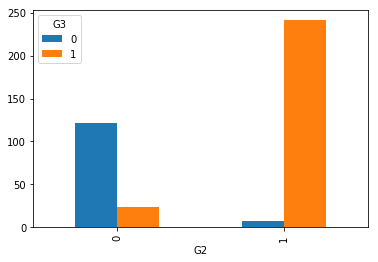

In [0]:
pd.crosstab(sd.G2,sd.G3).plot(kind='bar')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

<Container object of 2 artists>

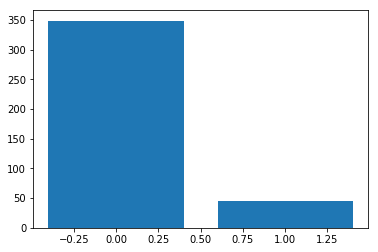

In [0]:
plt.bar(sd.loc[:,"school"].unique(), sd.loc[:,"school"].value_counts())

<Container object of 8 artists>

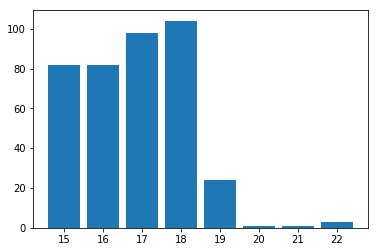

In [0]:
plt.bar(sd.loc[:,"age"].unique(), sd.loc[:,"age"].value_counts())

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [0]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [0]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.9266666666666666
0.9444444444444445
0.8736842105263158
0.9076923076923076


# Naive bayes with Iris data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [0]:
# Load using input file
iris=pd.read_csv("D:/check/Solutions/Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# Check dimension of data
iris.shape

(150, 6)

In [0]:
#Check shape of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
# No Null values found

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [0]:
#Check the dataset
print(y)
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

### Find the distribution of target variable (Class)

In [0]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

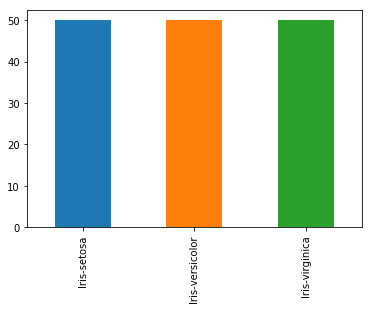

In [0]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\vikash.chandra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


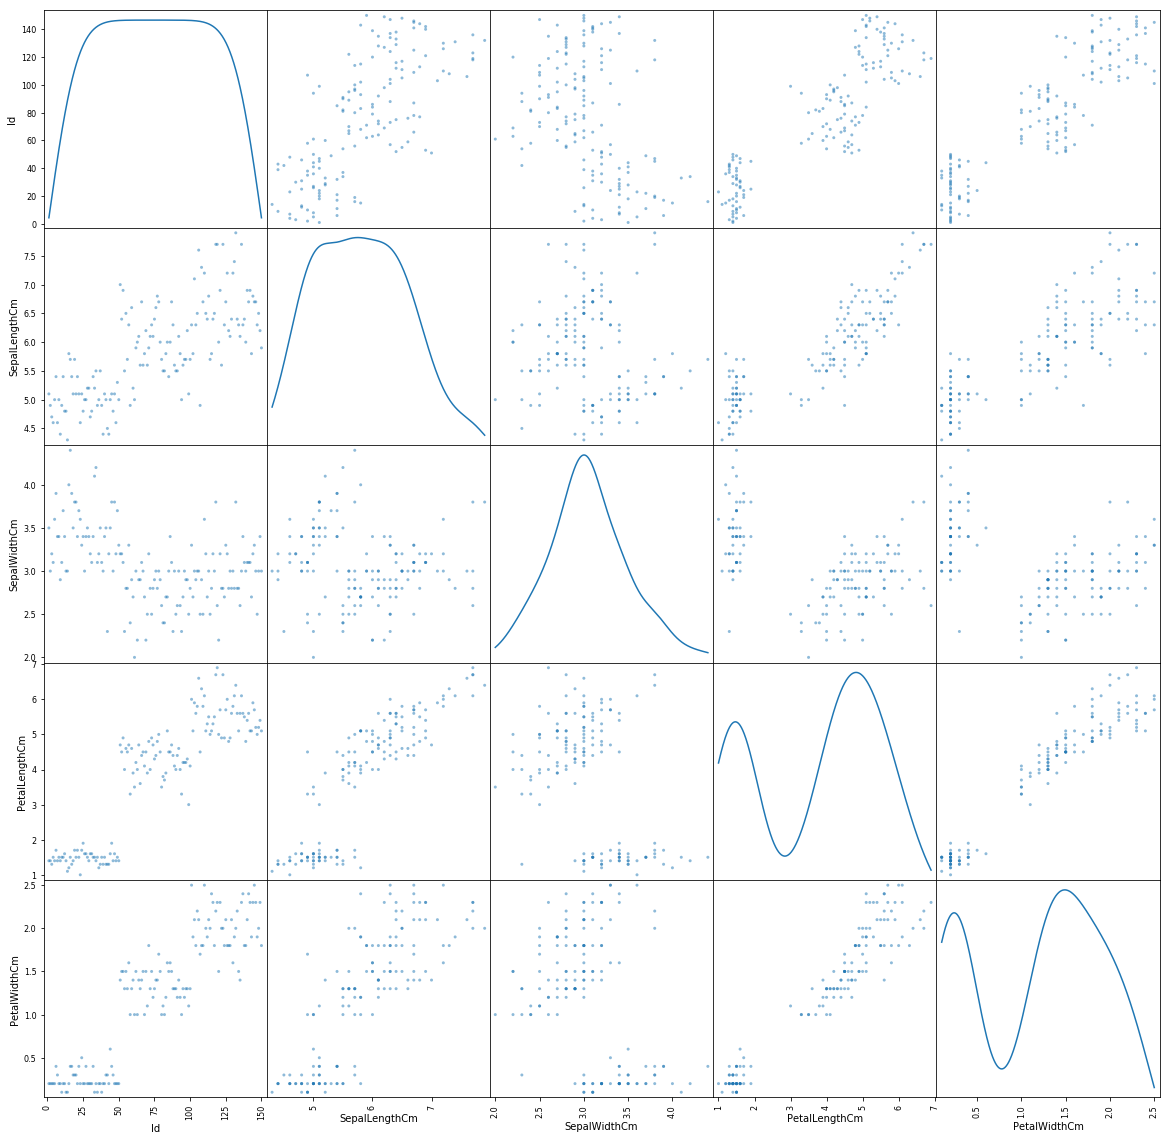

In [0]:
spd = pd.plotting.scatter_matrix(iris, figsize=(20,20), diagonal="kde")

### Summary Statistics and explain insights for at least 2 variables

In [0]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [0]:
iris = iris.drop(["Id"], axis=1)

### Correlation among all variables and give your insights

In [0]:
corr = iris.corr()
corr
#Please note, it's Required to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.We will ignore it here

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20

In [0]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Do Feature Scaling

In [0]:
### NORMALIZTION / FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [0]:
### WE WILL FIT THE THE CLASSIFIER TO THE TRAINING SET
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [0]:
y_pred = naiveClassifier.predict(X_test)

In [0]:
#Keeping the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#Actual->LEFT
#predicted->RIGHT
#Number of values to be print
y_compare[:20,:]

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor']], dtype=object)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 14]]


In [0]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  30
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

    avg / total       1.00      1.00      1.00        30

